In [1]:
import warnings
warnings.filterwarnings('ignore')
import librosa
import numpy as np
import scipy
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

In [5]:
audio_file = 'Instruments/piano_A.mp3' ## This is A5 to be precise having fundamental frequency = 440 Hz
audio_data,audio_sr = librosa.load(audio_file,duration=2,offset = 0.5)
ipd.Audio(audio_data,rate = audio_sr)

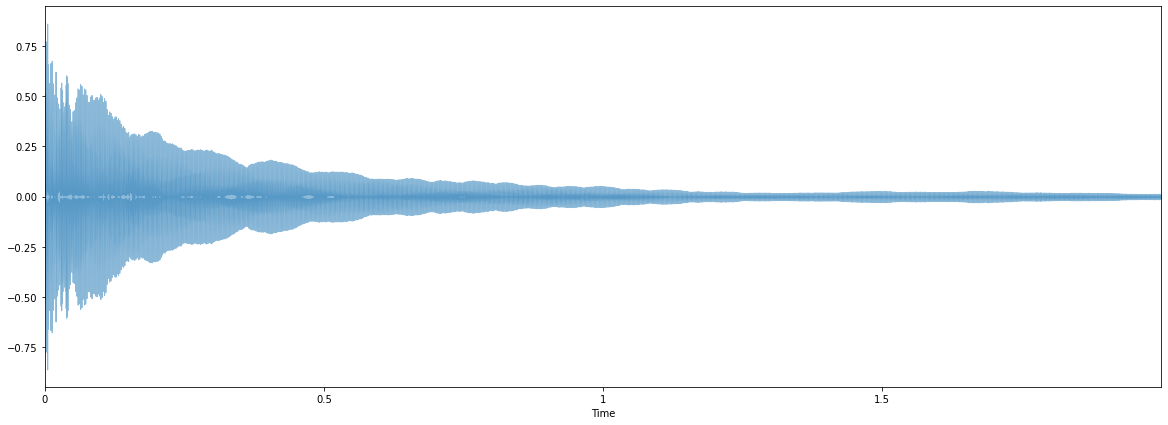

In [6]:
plt.figure(figsize = (20,7))
librosa.display.waveplot(audio_data,alpha=0.5)
plt.show()

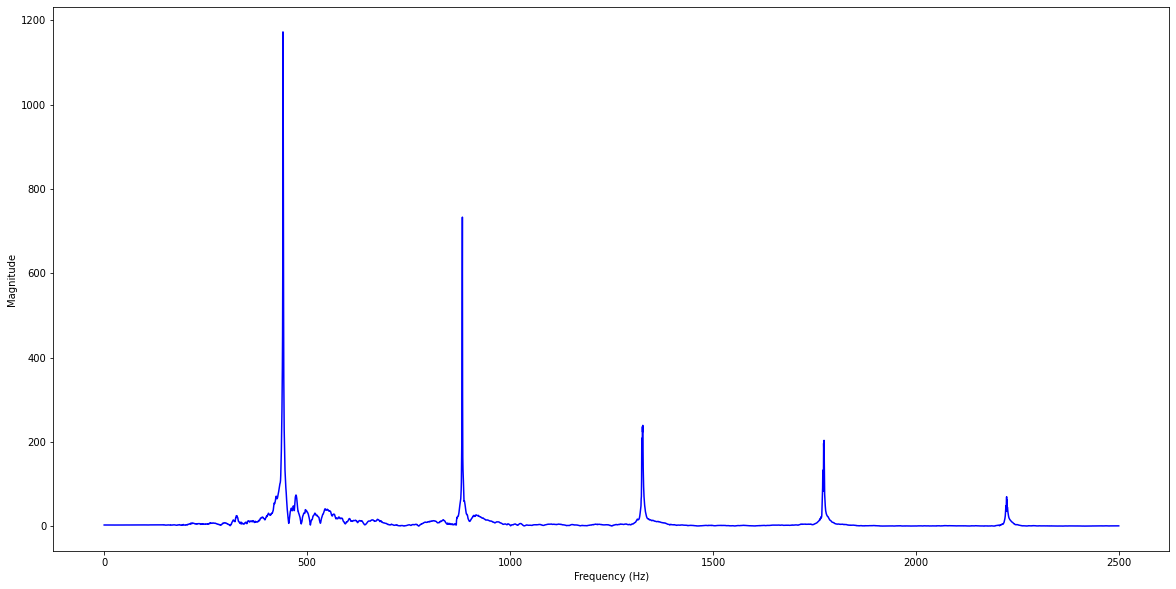

In [7]:
fft = scipy.fft.fft(audio_data) ## Fast Fourier transform
magnitude = np.absolute(fft) ## Takes the magnidute of the complex numbers
frequency = np.linspace(0,audio_sr,len(magnitude)) ## Now on x axis we are measuring the highest frequency = audio_sr 
plt.figure(figsize = (20,10))                      ## and we want all the samples ie; 44100 here so we create equispaced
plt.plot(frequency[:5000],magnitude[:5000],color = 'blue') ## frequency values upto 22050 Hz
plt.xlabel('Frequency (Hz)')                              ## ∆f = 1/T where T is the duartion of the signal
plt.ylabel('Magnitude')
plt.show()

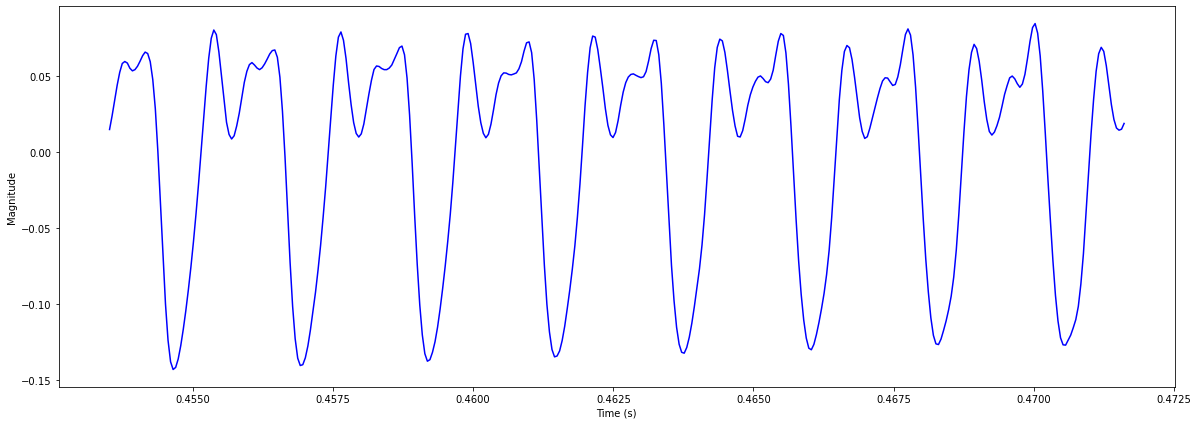

In [8]:
## Zooming in to the waveplot
samples = range(len(audio_data))
t = librosa.samples_to_time(samples)
plt.figure(figsize = (20,7))
plt.plot(t[10000:10400],audio_data[10000:10400],color = 'blue')
plt.ylabel('Magnitude')
plt.xlabel('Time (s)')
plt.show()

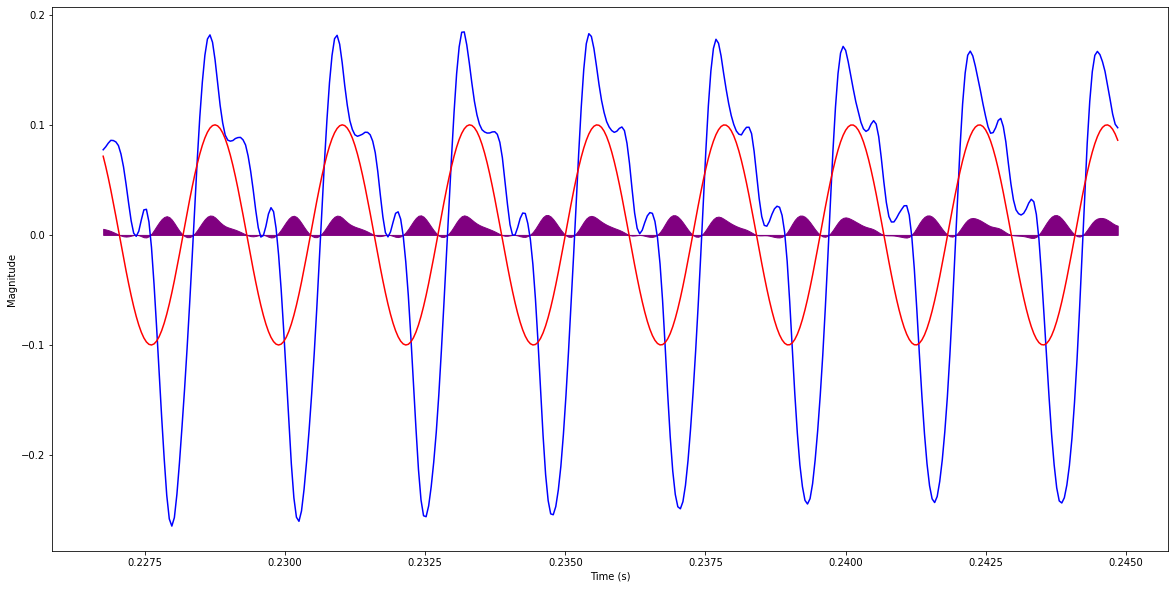

In [9]:
## Lets calculate the similarity for fundamental frequency
F_FREQ = 440
d_440 = 1/F_FREQ
PHASE = 0.4

sin = 0.1*np.sin(2*np.pi*(F_FREQ*t - PHASE))

plt.figure(figsize = (20,10))
plt.plot(t[5000:5400],audio_data[5000:5400],color = 'blue')
plt.plot(t[5000:5400],sin[5000:5400],color = 'r')
plt.fill_between(t[5000:5400],audio_data[5000:5400]*sin[5000:5400],color = 'purple')
plt.ylabel('Magnitude')
plt.xlabel('Time (s)')
plt.show()
## This is for just one frequency but there are many frequencies as we can see in the fft so we need to repeat the process
## for all frequencuiesie from 0 to 22050 Hz

In [4]:
## we superimpose three sinsuiods with fundamental freq and 2 harmonics of it.
def generate_signal(fund_freq,time):
    sin = np.sin(2*np.pi*fund_freq*time)
    sin2 = np.sin(2*np.pi*2*fund_freq*time)
    sin3 = np.sin(2*np.pi*3*fund_freq*time)
    return sin + sin2 + sin3

In [5]:
def plot_gen_signal(signal,time):
    plt.figure(figsize = (20,7))
    return plt.plot(time,signal,color = 'red')

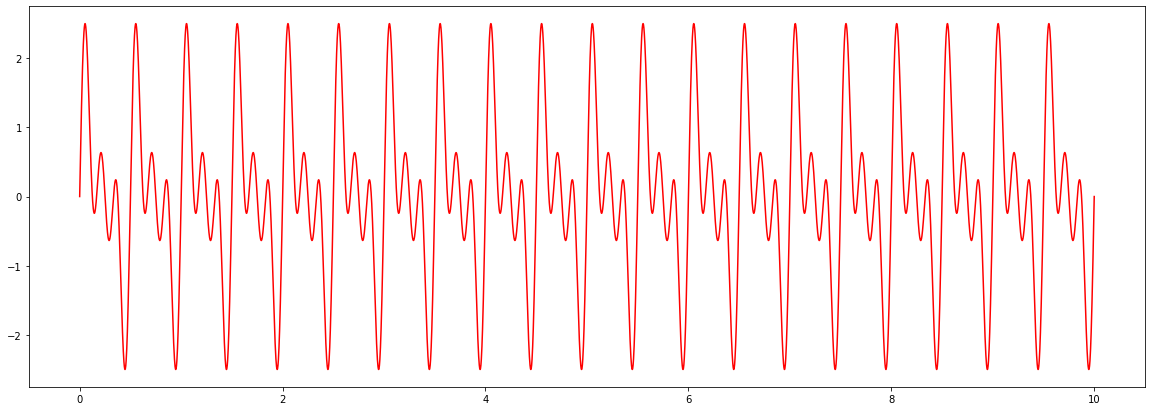

In [6]:
time = np.linspace(0,10,5000)
signal = generate_signal(2,time)
plot_gen_signal(signal,time)

In [48]:
def cog(f_transform):
    x = np.mean(f_transform.real)
    y = np.mean(f_transform.imag)
    return (x,y)

In [49]:
def sum_up(f_transform):
    x = np.sum(f_transform.real)
    y = np.sum(f_transform.imag)
    return (x,y)

In [68]:
def plot_cft(pure_tone_freq,signal_freq,time,centre_of_gravity = False,plot_sum = False):
    
    signal = generate_signal(signal_freq,time)
    exp_part = np.exp(-2j*np.pi*pure_tone_freq*time)
    multiplication = np.multiply(signal,exp_part)  ## g(t)*e^(-i2*pi*f*t) just multiplying signal with pure tone freq &
    real_part = multiplication.real                ## getting the similarity if the pure tone freq is present in the signal
    imag_part = multiplication.imag                ## then it shows a stsble fourier transform and cog is far from 0
    plt.figure(figsize=(10,10))
    plt.plot(real_part,imag_part,color = 'b')
    
    if plot_sum:
        x,y = sum_up(multiplication)
        plt.plot(x,y,marker = 'o',color = 'r',markersize = 10)
    
    if centre_of_gravity:
        x,y = cog(multiplication)
        plt.plot(x,y,marker = '*',color = 'g',markersize = 10)
    
    if not centre_of_gravity and not plot_sum:
        plt.ylim([-5,5])
        plt.xlim([-5,5])
        
    plt.grid()
    plt.show()

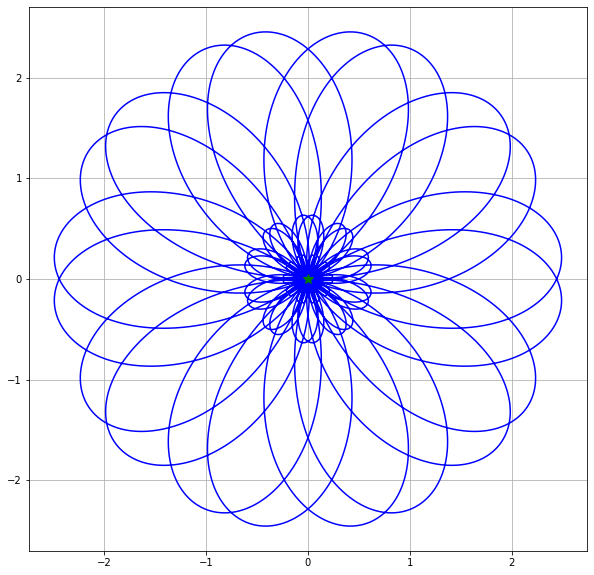

In [74]:
## 1.1Hz pure tone freq has less similarity in superimposition of 1,2,3 Hz sin waves
plot_cft(pure_tone_freq=1.1,signal_freq=1,time=time,centre_of_gravity=True)

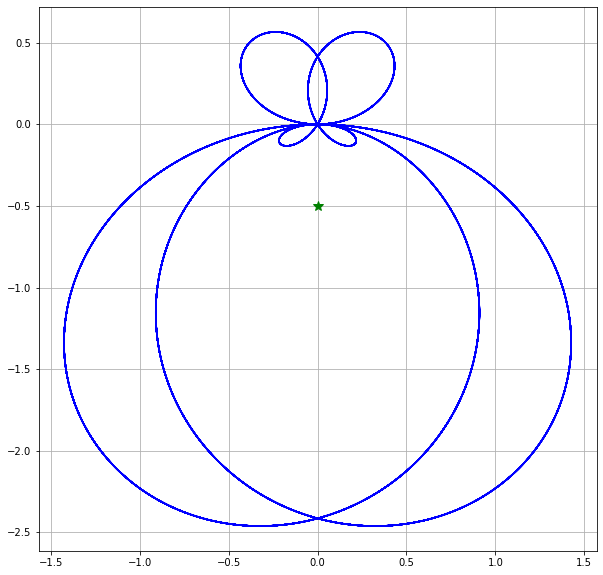

In [75]:
## 2Hz pure tone freq has more similarity in superimposition of 1,2,3 Hz sin waves
plot_cft(pure_tone_freq=2,signal_freq=1,time=time,centre_of_gravity=True)

In [78]:
def freq_amplitude(signal_freq,pure_tone_freqs,time):
    
    signal = generate_signal(fund_freq = signal_freq,time = time)
    magnitudes = []
    
    for pure_tone_freq in pure_tone_freqs:
        exp_factor = np.exp(-2j*np.pi*pure_tone_freq*time)
        multiplication = np.multiply(signal,exp_factor)
        x_magnitude = sum(multiplication.real)
        y_magnitude = sum(multiplication.imag)
        magnitude = np.sqrt(x_magnitude**2 + y_magnitude**2)
        magnitudes.append(magnitude)
    
    return pure_tone_freqs,magnitudes

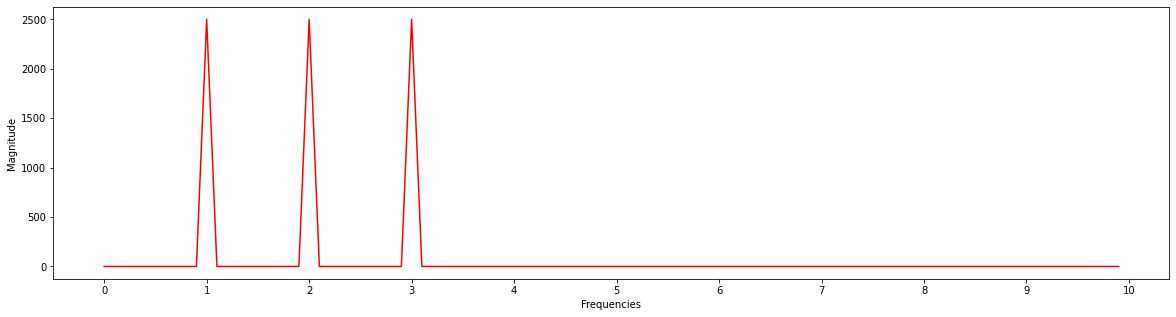

In [92]:
pure_tone_freqs = np.arange(0,10,0.1)
pure_tone_freqs,magnitudes = freq_amplitude(signal_freq=1,pure_tone_freqs=pure_tone_freqs,time=time)
plt.figure(figsize = (20,5))
plt.plot(pure_tone_freqs,magnitudes,color = 'r')
plt.xlabel('Frequencies')
plt.ylabel('Magnitude')
plt.xticks(range(11))
plt.show()